Acerca del DataSet
Bank Marketing
Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
Este conjunto de datos esta relacionado con diferentes campannas de marketing via telefonica, de un banco Portugues. El objetivo de la clasificación es predecir si el cliente suscribirá un depósito a plazo fijo (la variable y).

Informacion de los datos:
Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario a plazo) estaría si o no suscrito.

Informacion de las Variables:

**Informacion Bancaria del Cliente:**
Age (numeric) "Edad"

Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown') "Trabajo"

Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed) "Estado Civil"

Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') "Educacion"

Default: has credit in default? (categorical: 'no', 'yes', 'unknown') "situación jurídica en la que se encuentra un obligado al retrasarse en el cumplimiento de una obligación de pago."

Housing: has housing loan? (categorical: 'no', 'yes', 'unknown') "tiene préstamo de vivienda?"

Loan: has personal loan? (categorical: 'no', 'yes', 'unknown') "tiene prestamo personal?"

**Ultimo contacto de la campanna actual:**

Contact: contact communication type (categorical:
'cellular','telephone') "Tipo de Contacto"

Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
…, 'nov', 'dec') "Ultimo mes de contacto "

Day_of_week: last contact day of the week (categorical:
'mon','tue','wed','thu','fri') "Ultimo dia de contacto"

Duration: last contact duration, in seconds (numeric). Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes and
should be discarded if the intention is to have a realistic
predictive model. "Duracion de la llamada" #Debe descartarse ya que es interpretada y no real

Otras variables:
Campaign: number of contacts performed during this campaign and for
this client (numeric, includes last contact) "Numero de contactos con el cliente en la campanna hasta el ultimo incluido"

Pdays: number of days that passed by after the client was last
contacted from a previous campaign (numeric; 999 means client was not
previously contacted) "Dias pasados desde la ultima campanna" 

Previous: number of contacts performed before this campaign and for
this client (numeric) "Contactos previos a esta campanna"

Poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')

**Variables de contexto social y economico:**
Emp.var.rate: employment variation rate - quarterly indicator
(numeric) "Tasa de variacion de empleo"

Cons.price.idx: consumer price index - monthly indicator (numeric) "Indice de precios al consumidor"

Cons.conf.idx: consumer confidence index - monthly indicator
(numeric) "Indice de confianza del consumidor"

Euribor3m: euribor 3 month rate - daily indicator (numeric) "Indicador diario de Euribor"

Nr.employed: number of employees - quarterly indicator (numeric) "Nro de empleado indicador trimestral"

Output variable (desired target):
y - has the client subscribed a term deposit? (binary: 'yes', 'no') "Variable Target de suscipcion al plazo fijo"


Source:
Dataset from : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [30]:
import pandas as pd
import numpy as np
import missingno as msno
import os
import joblib
from sklearn import preprocessing
from category_encoders import one_hot
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
from scipy.stats import chi2_contingency
from collections import defaultdict
from category_encoders import one_hot

In [31]:
data_set=pd.read_csv("bank.csv")
data_set.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,52,admin.,single,university.degree,unknown,unknown,unknown,cellular,aug,wed,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
1,49,blue-collar,divorced,high.school,no,no,yes,telephone,may,mon,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,25,blue-collar,single,basic.9y,no,yes,yes,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
3,27,admin.,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-0.1,93.798,-40.4,4.860,5195.8,1
4,44,admin.,married,university.degree,no,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,0


Exploracion de dataset

In [32]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   int64  
 1   job             5000 non-null   object 
 2   marital         5000 non-null   object 
 3   education       5000 non-null   object 
 4   default         5000 non-null   object 
 5   housing         5000 non-null   object 
 6   loan            5000 non-null   object 
 7   contact         5000 non-null   object 
 8   month           5000 non-null   object 
 9   day_of_week     5000 non-null   object 
 10  duration        5000 non-null   int64  
 11  campaign        5000 non-null   int64  
 12  pdays           5000 non-null   int64  
 13  previous        5000 non-null   int64  
 14  poutcome        5000 non-null   object 
 15  emp.var.rate    5000 non-null   float64
 16  cons.price.idx  5000 non-null   float64
 17  cons.conf.idx   5000 non-null   f

In [33]:
data_set.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,39.581400,265.173400,2.53760,958.682000,0.177800,0.05834,93.569322,-40.538980,3.596636,5166.480940,0.118200
std,10.254112,263.436793,2.81776,196.012383,0.505013,1.58084,0.577387,4.606221,1.742869,71.908468,0.322877
min,17.000000,1.000000,1.00000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,105.000000,1.00000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.00000,999.000000,0.000000,1.10000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,46.000000,329.000000,3.00000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,92.000000,3284.000000,56.00000,999.000000,6.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [34]:
pd.set_option('display.max_rows', None)

serie = (data_set.isnull().sum()/data_set.shape[0])*100 
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

<AxesSubplot: >

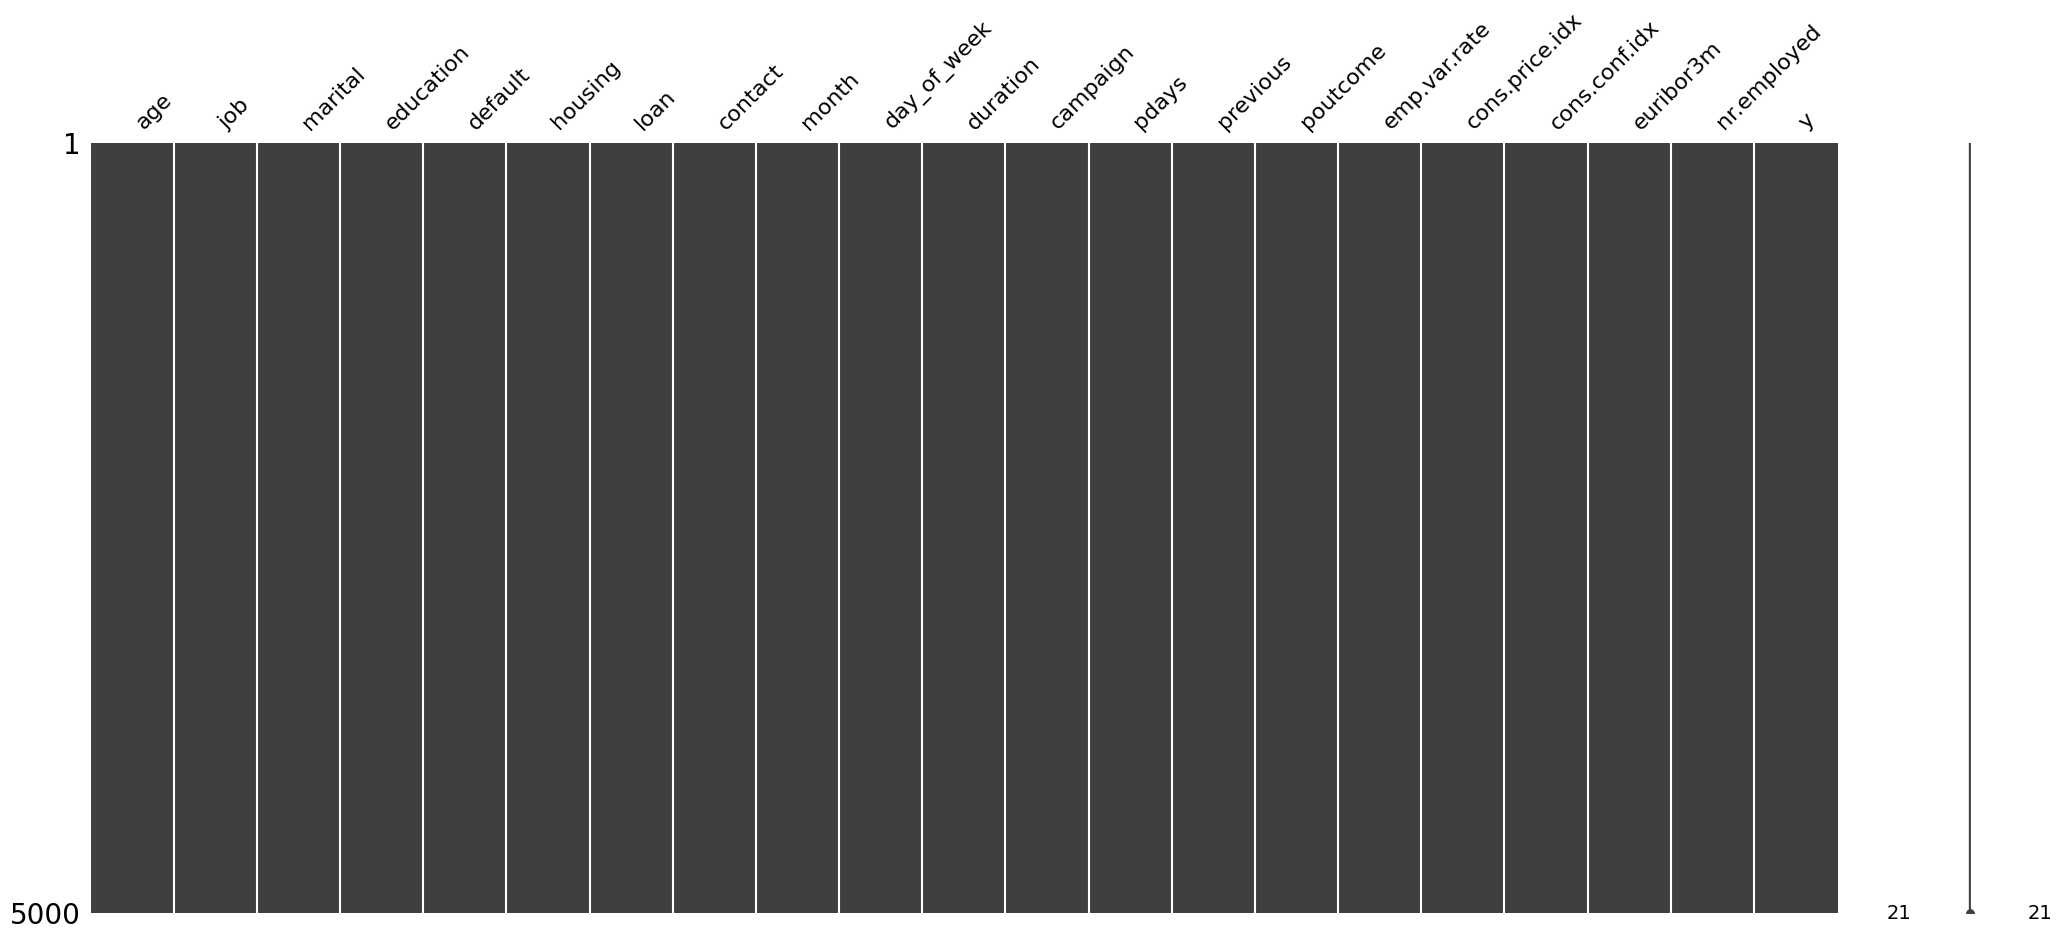

In [35]:
msno.matrix(data_set)

In [36]:
data_set.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [37]:
categorias= ['job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','y']
for a in categorias:
    print("Categorias de",a,": \n",data_set[a].value_counts(),'\n',)

Categorias de job : 
 admin.           1260
blue-collar      1170
technician        812
services          450
management        368
retired           187
entrepreneur      181
self-employed     158
unemployed        131
student           129
housemaid         118
unknown            36
Name: job, dtype: int64 

Categorias de marital : 
 married     3026
single      1467
divorced     498
unknown        9
Name: marital, dtype: int64 

Categorias de education : 
 university.degree      1457
high.school            1126
basic.9y                759
professional.course     634
basic.4y                505
basic.6y                301
unknown                 216
illiterate                2
Name: education, dtype: int64 

Categorias de default : 
 no         3998
unknown    1002
Name: default, dtype: int64 

Categorias de housing : 
 yes        2604
no         2278
unknown     118
Name: housing, dtype: int64 

Categorias de loan : 
 no         4144
yes         738
unknown     118
Name: loan, dtype

In [38]:
PocasCategorias=[data_set.job,data_set.education,data_set.month,data_set.day_of_week]
MuchasCategorias=[data_set.marital,data_set.default,data_set.housing,data_set.loan,data_set.contact,data_set.poutcome]

In [39]:
label_encode=pd.DataFrame(PocasCategorias)
hoe_encode=pd.DataFrame(MuchasCategorias)
label_encode=label_encode.transpose()
hoe_encode=hoe_encode.transpose()
label_encode.head(4)

,job,education,month,day_of_week
0,admin.,university.degree,aug,wed
1,blue-collar,high.school,may,mon
2,blue-collar,basic.9y,jul,wed
3,admin.,university.degree,oct,tue


In [40]:
ce_ohe=one_hot.OneHotEncoder(use_cat_names=True) 
ce_dummies=ce_ohe.fit_transform(hoe_encode)
print(ce_dummies)

      marital_single  marital_divorced  marital_married  marital_unknown  \
0                  1                 0                0                0   
1                  0                 1                0                0   
2                  1                 0                0                0   
3                  1                 0                0                0   
4                  0                 0                1                0   
5                  0                 0                1                0   
6                  0                 1                0                0   
7                  0                 0                1                0   
8                  0                 0                1                0   
9                  0                 0                1                0   
10                 0                 0                1                0   
11                 1                 0                0                0   
12          

In [41]:
data_set_trabajo= pd.concat([ce_dummies], axis=1) 
data_set_trabajo.head(5)

,marital_single,marital_divorced,marital_married,marital_unknown,default_unknown,default_no,housing_unknown,housing_no,housing_yes,loan_unknown,loan_yes,loan_no,contact_cellular,contact_telephone,poutcome_nonexistent,poutcome_success,poutcome_failure
0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0
1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0
2,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
4,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0


In [42]:
le = preprocessing.LabelEncoder()
data_set_trabajo['job']=le.fit_transform(data_set['job'])
data_set_trabajo['education']=le.fit_transform(data_set['education'])
data_set_trabajo['month']=le.fit_transform(data_set['month'])
data_set_trabajo['day_of_week']=le.fit_transform(data_set['day_of_week'])

In [43]:
data_set_trabajo.head(5)

,marital_single,marital_divorced,marital_married,marital_unknown,default_unknown,default_no,housing_unknown,housing_no,housing_yes,loan_unknown,...,loan_no,contact_cellular,contact_telephone,poutcome_nonexistent,poutcome_success,poutcome_failure,job,education,month,day_of_week
0,1,0,0,0,1,0,1,0,0,1,...,0,1,0,1,0,0,0,6,1,4
1,0,1,0,0,0,1,0,1,0,0,...,0,0,1,1,0,0,1,3,6,1
2,1,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,2,3,4
3,1,0,0,0,0,1,0,1,0,0,...,1,0,1,1,0,0,0,6,8,3
4,0,0,1,0,0,1,0,0,1,0,...,1,1,0,1,0,0,0,6,1,4


In [53]:
data_set['job'] = data_set['job'].astype('category')
data_set['marital'] = data_set['marital'].astype('category')
data_set['education'] = data_set['education'].astype('category')
data_set['default'] = data_set['default'].astype('category')
data_set['housing'] = data_set['housing'].astype('category')
data_set['loan'] = data_set['loan'].astype('category')
data_set['contact'] = data_set['contact'].astype('category')
data_set['month'] = data_set['month'].astype('category')
data_set['day_of_week'] = data_set['day_of_week'].astype('category')
data_set['duration'] = data_set['duration'].astype('category')
data_set['campaign'] = data_set['campaign'].astype('category')
data_set['pdays'] = data_set['pdays'].astype('category')
data_set['previous'] = data_set['previous'].astype('category')
data_set['poutcome'] = data_set['poutcome'].astype('category')
data_set['y'] = data_set['y'].astype('category')

In [54]:
# Definir la función de Cramer's V

def cramers_v(x, y):

  confusion_matrix = pd.crosstab(x,y)

  chi2 = chi2_contingency(confusion_matrix)[0]

  n = confusion_matrix.sum().sum()

  phi2 = chi2/n

  r, k = confusion_matrix.shape

  phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))

  rcorr = r - ((r-1)**2)/(n-1)

  kcorr = k - ((k-1)**2)/(n-1)

  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [55]:
# calcular el estadístico de Cramer's V para cada par de columnas categóricas

columns = data_set.select_dtypes(include=['category']).columns.tolist()

corr_dict = defaultdict(dict)

for i, col1 in enumerate(columns):

  for j, col2 in enumerate(columns):

    if j <= i:

      continue

    corr_dict[col1][col2] = cramers_v(data_set[col1], data_set[col2])

In [56]:
corr_df = pd.DataFrame.from_dict(corr_dict)

Text(0.5, 1.0, "Mapa de calor de correlación - Cramer's V")

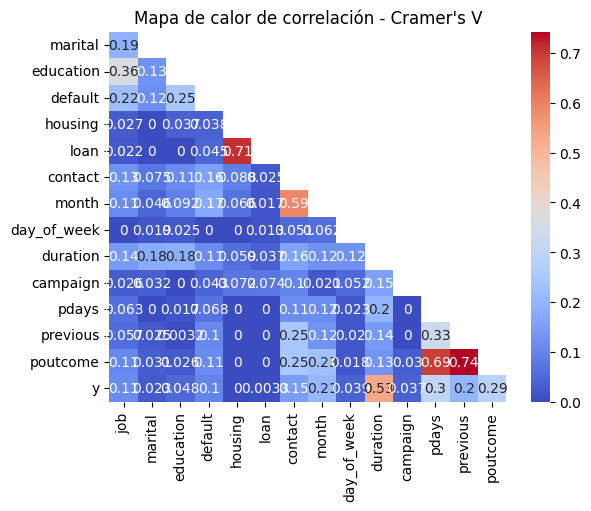

In [57]:
# crear el mapa de calor utilizando los valores de Cramer's V

sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación - Cramer\'s V')